In [13]:
import pandas as pd
import pickle
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import pearsonr
from sklearn.metrics import r2_score

warnings.filterwarnings("ignore")

In [14]:
# domains = ['trait', 'risk', 'people', 'food', 'occupation', 'brand', 'good']
dims = [('masculine', 'feminine'),
       ('dread-inducing', 'unknowable'),
       ('warm', 'competent'),
       ('tasty', 'nutritious'),
       ('significance', 'autonomy'),
       ('sincere', 'exciting'),
       ('hedonic', 'utilitarian')]
# scatterplot_titles = ['Personality traits', 'Risk sources', 'People', 'Foods', 'Occupations', 'Brands', 'Consumer goods']

dim_names_flattened = [x for dim_pair in dims for x in dim_pair]

In [15]:
# dims = [('sincere','exciting'),
#         ('hedonic','utilitarian'),
#         ('masculine','feminine'),
#         ('tasty','nutritious'),
#         ('significance','autonomy'),
#         ('dread-inducing','unknowable'),
#         ('warm', 'competent')]

# # dims = [('masculine', 'feminine')]

# dim_names_flattened = [x for dim_pair in dims for x in dim_pair]

In [16]:
rs = []
# r2s = []
for dim in dim_names_flattened:
    preds_and_actual = pd.read_csv(f'results/best_ridge_pred_vs_actual/{dim}.csv')
#     preds_and_actual = pd.read_csv(f'results/best_ridge_pred_vs_actual_nothing_dropped/{dim}.csv')
#     preds_and_actual = pd.read_csv(f'results/best_ridge_pred_vs_actual_normalized_vectors/{dim}.csv')
#     preds_and_actual = pd.read_csv(f'results/grand_method_actual_vs_pred/{dim}.csv')
#     preds_and_actual = pd.read_csv(f'results/grand_method_actual_vs_pred_paragram//{dim}.csv')
    r, _ = pearsonr(x=preds_and_actual[f'Actual {dim}'], y=preds_and_actual[f'Predicted {dim}'])
    rs.append(r)
    
#     r2 = r2_score(y_true=preds_and_actual[f'Actual {dim}'], y_pred=preds_and_actual[f'Predicted {dim}'])
#     r2s.append(r2)
np.mean(rs)
# np.mean(r2s)

0.7693233150346515

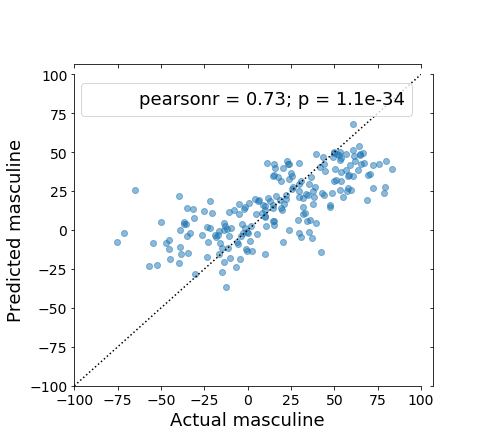

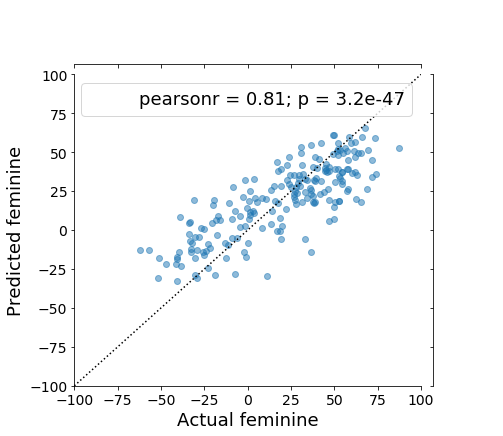

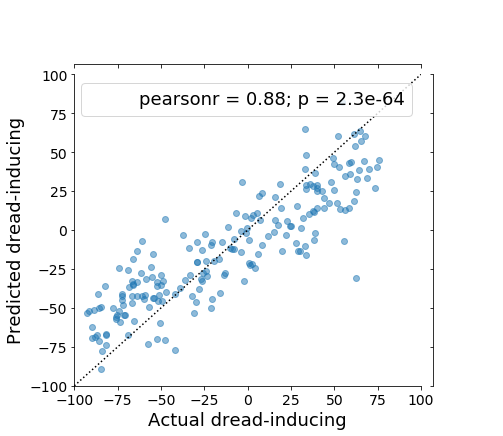

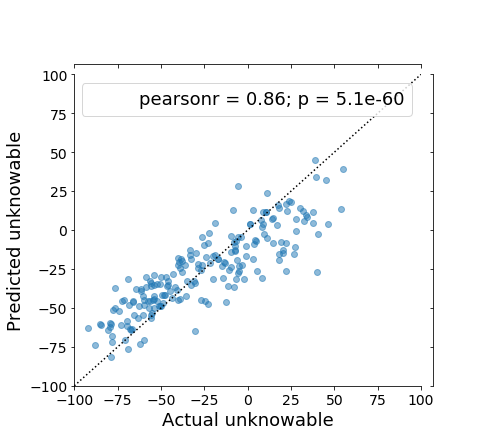

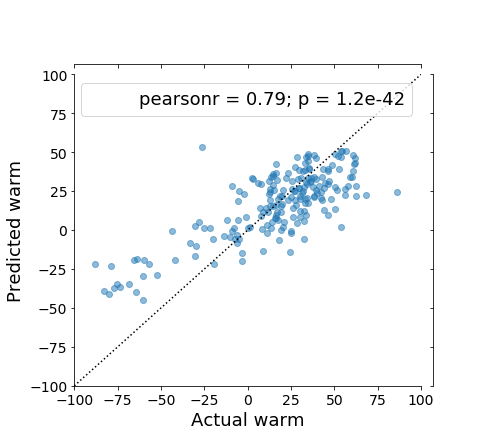

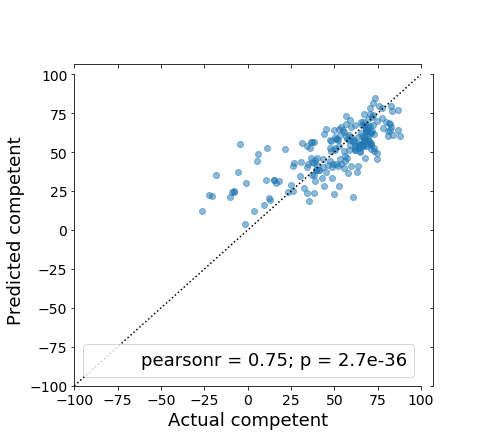

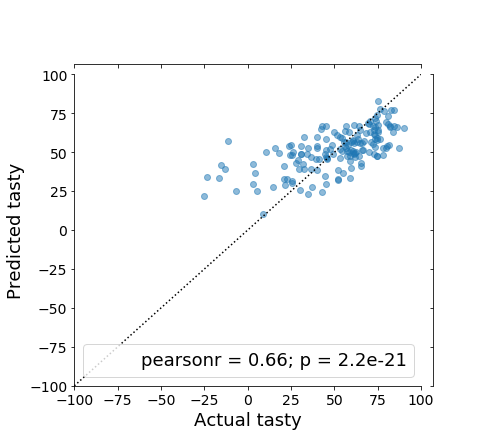

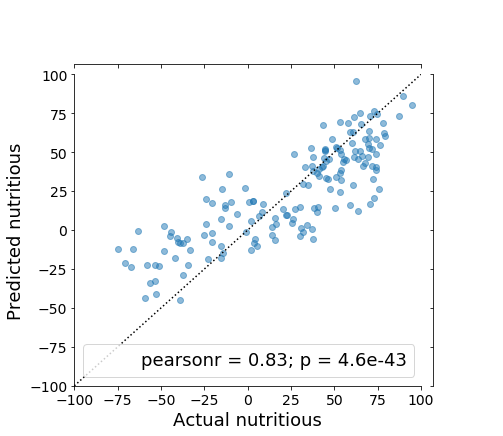

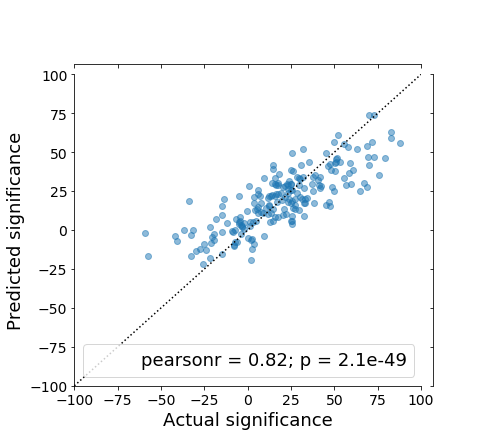

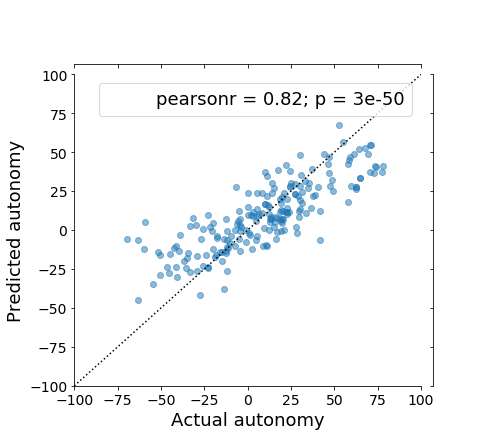

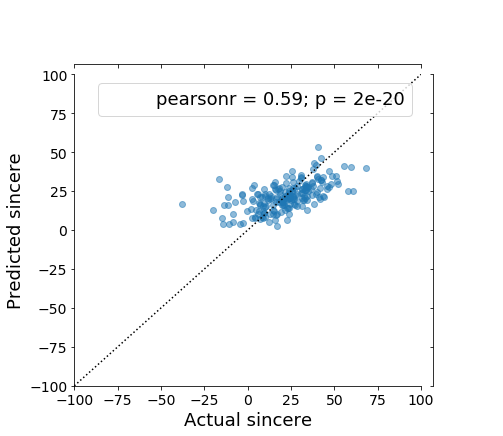

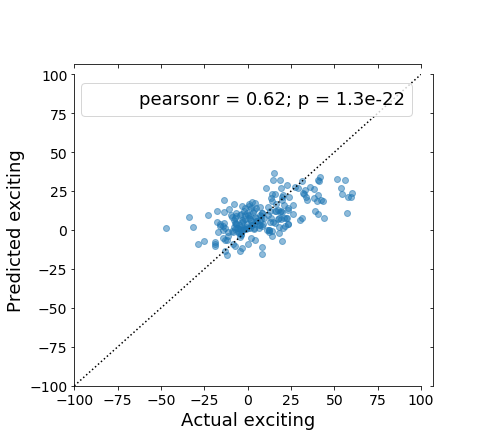

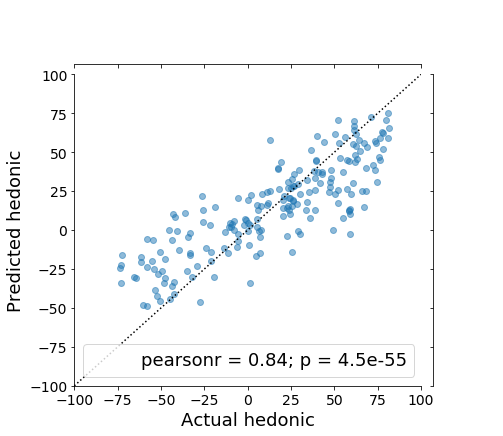

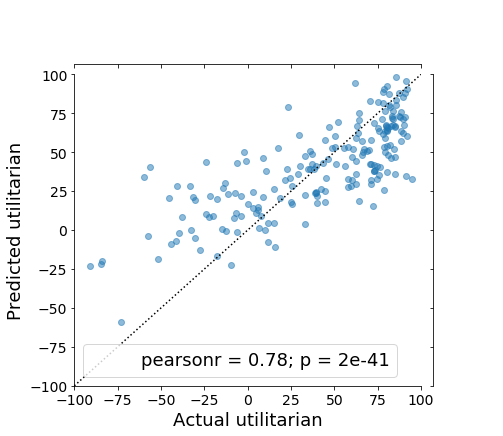

In [17]:
for dim in dim_names_flattened:
    preds_and_actual = pd.read_csv(f'results/best_ridge_pred_vs_actual/{dim}.csv')
#     preds_and_actual = pd.read_csv(f'results/best_ridge_pred_vs_actual_nothing_dropped/{dim}.csv')
#     preds_and_actual = pd.read_csv(f'results/best_ridge_pred_vs_actual_normalized_vectors/{dim}.csv')
#     preds_and_actual = pd.read_csv(f'results/grand_method_actual_vs_pred/{dim}.csv')
    
    # for plotting in paper
#     g = sns.jointplot(x=f'Actual {dim}', y=f'Predicted {dim}', data=preds_and_actual, stat_func=pearsonr,
#                       xlim=(-100, 100), ylim=(-100,100), alpha=.5)

    
    # for plots in slides...only diff bw this and above is this has no marginal distributions
    g = sns.JointGrid(x=f'Actual {dim}', y=f'Predicted {dim}', data=preds_and_actual, xlim=(-100, 100), ylim=(-100,100))
    regplot_no_fit = lambda x, y: sns.regplot(x, y, fit_reg=False, scatter_kws={'alpha':0.5})
    g.plot_joint(regplot_no_fit)
    g.annotate(pearsonr, fontsize=18)
    g.fig.set_figwidth(7)

    # the below is to draw x=y on the plot
    x0, x1 = g.ax_joint.get_xlim()
    y0, y1 = g.ax_joint.get_ylim()
    lims = [max(x0, y0), min(x1, y1)]
    g.ax_joint.plot(lims, lims, ':k')    

    g.ax_joint.tick_params(labelsize=14)
    g.ax_joint.set_ylabel(f'Predicted {dim}', fontsize=18)
    g.ax_joint.set_xlabel(f'Actual {dim}',    fontsize=18)
    
    plt.savefig(f'figures/pred_v_actual_scatterplots_for_slides/{dim}.png')
#     plt.savefig(f'figures/pred_v_actual_scatterplots/{dim}.png')
#     plt.savefig(f'figures/grand_method_pred_v_actual_scatterplots/{dim}.png')
    plt.show()

In [18]:
all_dims_pred_v_actual = pd.DataFrame()
for dim in dim_names_flattened:
    preds_and_actual = pd.read_csv(f'results/best_ridge_pred_vs_actual/{dim}.csv')
#     preds_and_actual = pd.read_csv(f'results/best_ridge_pred_vs_actual_normalized_vectors/{dim}.csv')
#     preds_and_actual = pd.read_csv(f'results/best_ridge_pred_vs_actual/{dim}.csv')
#     preds_and_actual = pd.read_csv(f'results/best_ridge_pred_vs_actual_nothing_dropped/{dim}.csv')
    preds_and_actual.columns = ['word', 'Actual','Predicted']
    preds_and_actual['Judgment'] = dim
    
    all_dims_pred_v_actual = pd.concat([all_dims_pred_v_actual, preds_and_actual])
    
all_dims_pred_v_actual.head()

,word,Actual,Predicted,Judgment
0,capable,61.390244,47.858189,masculine
1,daring,69.486486,35.257054,masculine
2,sad,-52.475000,-22.726032,masculine
3,cheerful,-0.666667,-1.428136,masculine
4,committed,29.538462,43.192433,masculine


In [19]:
all_dims_pred_v_actual.tail()

,word,Actual,Predicted,Judgment
195,cereal,36.173913,50.684002,utilitarian
196,ballet,-27.533333,-12.883261,utilitarian
197,eraser,81.413043,80.556630,utilitarian
198,glasses,94.543478,32.686354,utilitarian
199,snacks,21.673913,32.242673,utilitarian


In [20]:
all_dims_pred_v_actual.Judgment = all_dims_pred_v_actual.Judgment.apply(lambda x: x.capitalize())

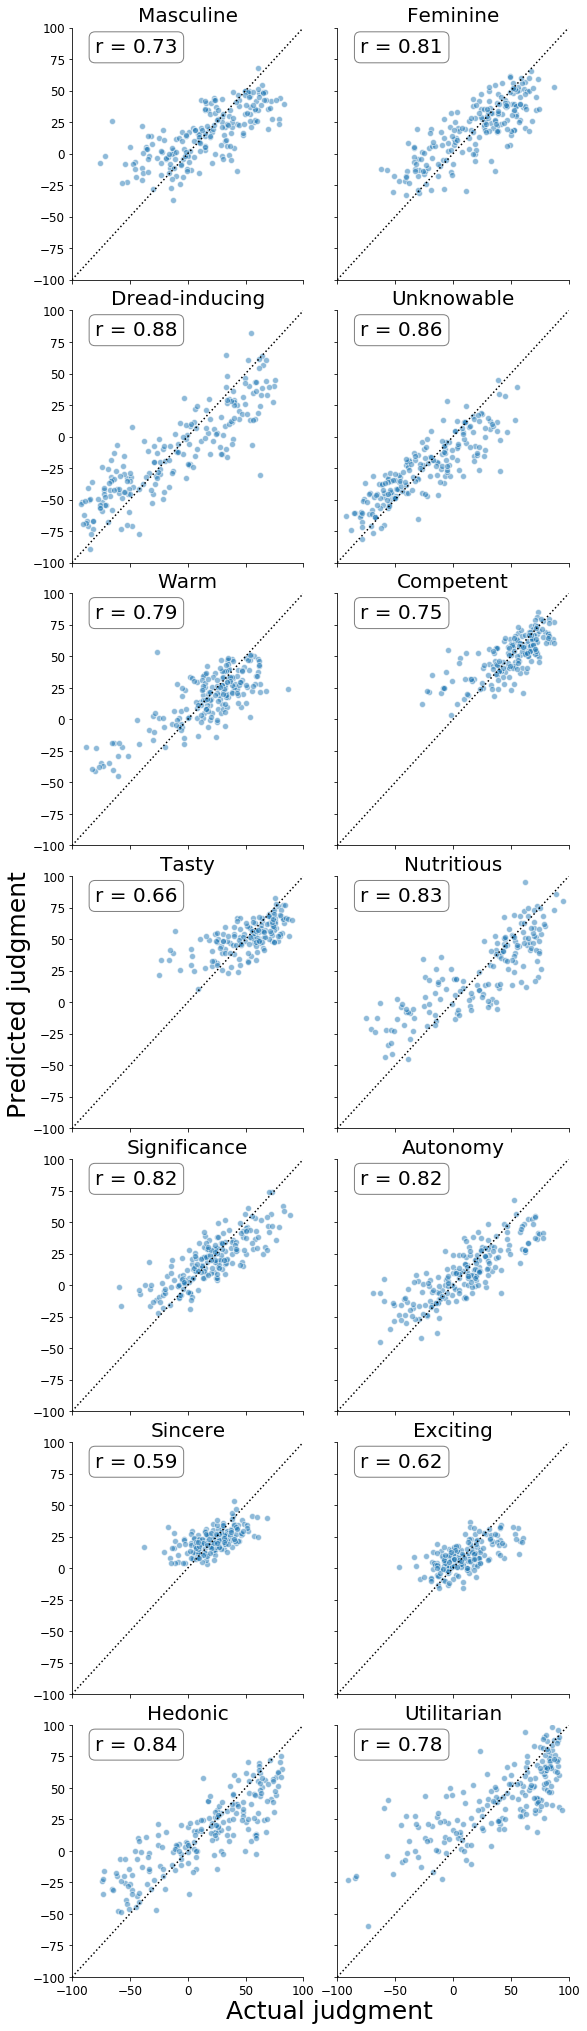

In [21]:
g = sns.FacetGrid(all_dims_pred_v_actual, col="Judgment", col_wrap=2, size=4, xlim=(-100,100), ylim=(-100,100))
g = (g.map(plt.scatter, "Actual", "Predicted", edgecolor="w", alpha=.5)
      .set_titles("{col_name}", size=20))

bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="grey", lw=1)

for ax, dim in zip(g.axes, dim_names_flattened):
    dim = dim.capitalize()
    ax.plot((-100,100), (-100,100), ':k') # makes the y=x line

    current_judgment_data = all_dims_pred_v_actual.query("Judgment==@dim")
    r, _= pearsonr(x=current_judgment_data['Actual'], y=current_judgment_data['Predicted'])
    ax.text(x=-80, y=80, s="r = {:.2f}".format(r), size=20, bbox=bbox_props)

g.set_axis_labels(x_var='', y_var='')
g.set_xticklabels(size=12)
g.set_yticklabels(size=12)
g.fig.text(x=.37 , y=0, s='Actual judgment', size=25);
g.fig.text(x=-.01, y=.56, s='Predicted judgment', size=25, rotation=90);

g.savefig('figures/pred_v_actual_scatterplots.png')
# g.savefig('figures/pred_v_actual_scatterplots_normalized_vectors.png')

In [22]:
all_dims_pred_v_actual.Judgment.unique()

array(['Masculine', 'Feminine', 'Dread-inducing', 'Unknowable', 'Warm',
       'Competent', 'Tasty', 'Nutritious', 'Significance', 'Autonomy',
       'Sincere', 'Exciting', 'Hedonic', 'Utilitarian'], dtype=object)

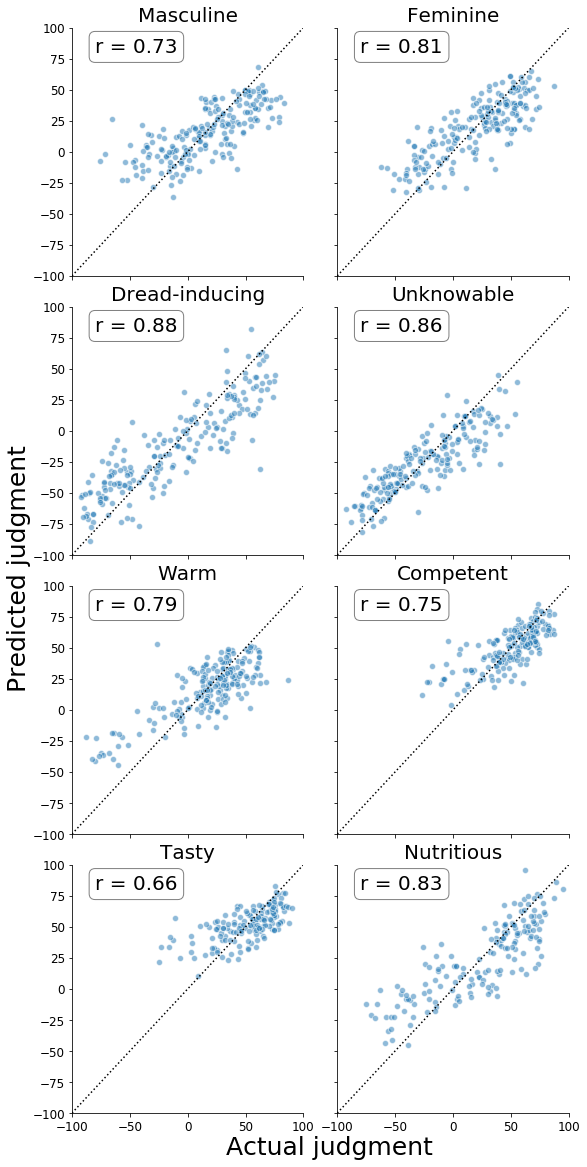

In [23]:
group1_dims = ['Masculine', 'Feminine', 'Dread-inducing', 'Unknowable', 'Warm', 'Competent', 'Tasty', 'Nutritious']

all_dims_pred_v_actual_group_1 = all_dims_pred_v_actual.query('Judgment in @group1_dims')

g = sns.FacetGrid(all_dims_pred_v_actual_group_1, col="Judgment", col_wrap=2, size=4, xlim=(-100,100), ylim=(-100,100))
g = (g.map(plt.scatter, "Actual", "Predicted", edgecolor="w", alpha=.5)
      .set_titles("{col_name}", size=20))

bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="grey", lw=1)

for ax, dim in zip(g.axes, group1_dims):
    dim = dim.capitalize()
    ax.plot((-100,100), (-100,100), ':k') # makes the y=x line

    current_judgment_data = all_dims_pred_v_actual.query("Judgment==@dim")
    r, _= pearsonr(x=current_judgment_data['Actual'], y=current_judgment_data['Predicted'])
    ax.text(x=-80, y=80, s="r = {:.2f}".format(r), size=20, bbox=bbox_props)

g.set_axis_labels(x_var='', y_var='')
g.set_xticklabels(size=12)
g.set_yticklabels(size=12)
g.fig.text(x=.37 , y=0, s='Actual judgment', size=25);
g.fig.text(x=-.01, y=.60, s='Predicted judgment', size=25, rotation=90);

# g.savefig('figures/pred_v_actual_scatterplots.png')
# g.savefig('figures/pred_v_actual_scatterplots_group1.eps', format='eps')
# g.savefig('figures/pred_v_actual_scatterplots_group1.png', format='png')
g.savefig('figures/pred_v_actual_scatterplots_group1.png', format='png', dpi=300)

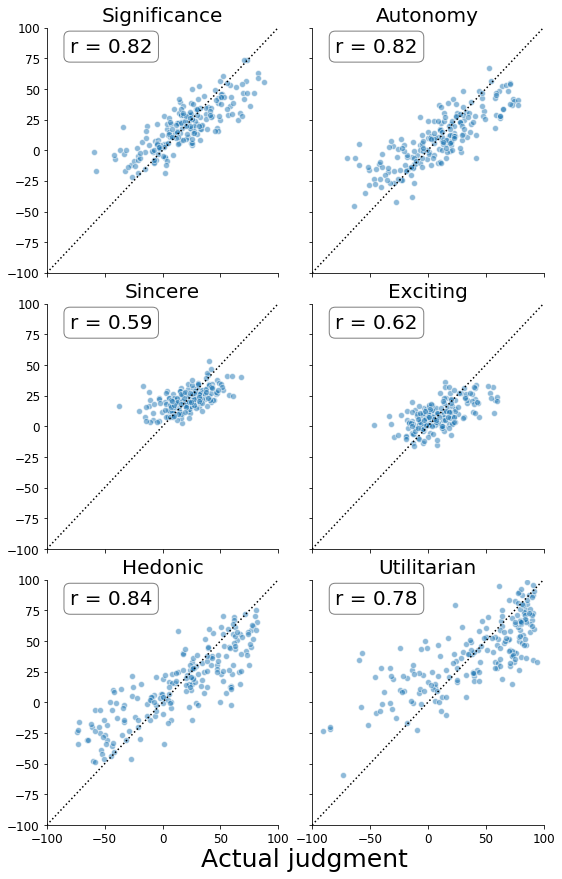

In [24]:
group2_dims = ['Significance', 'Autonomy','Sincere', 'Exciting', 'Hedonic', 'Utilitarian']

all_dims_pred_v_actual_group_1 = all_dims_pred_v_actual.query('Judgment in @group2_dims')

g = sns.FacetGrid(all_dims_pred_v_actual_group_1, col="Judgment", col_wrap=2, size=4, xlim=(-100,100), ylim=(-100,100))
g = (g.map(plt.scatter, "Actual", "Predicted", edgecolor="w", alpha=.5)
      .set_titles("{col_name}", size=20))

bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="grey", lw=1)

for ax, dim in zip(g.axes, group2_dims):
    dim = dim.capitalize()
    ax.plot((-100,100), (-100,100), ':k') # makes the y=x line

    current_judgment_data = all_dims_pred_v_actual.query("Judgment==@dim")
    r, _= pearsonr(x=current_judgment_data['Actual'], y=current_judgment_data['Predicted'])
    ax.text(x=-80, y=80, s="r = {:.2f}".format(r), size=20, bbox=bbox_props)

g.set_axis_labels(x_var='', y_var='')
g.set_xticklabels(size=12)
g.set_yticklabels(size=12)
g.fig.text(x=.37 , y=0, s='Actual judgment', size=25);
# g.fig.text(x=-.01, y=.63, s='Predicted judgment', size=25, rotation=90);

# g.savefig('figures/pred_v_actual_scatterplots.png')
# g.savefig('figures/pred_v_actual_scatterplots_group2.eps', format='eps')
# g.savefig('figures/pred_v_actual_scatterplots_group2.png', format='png')
g.savefig('figures/pred_v_actual_scatterplots_group2.png', format='png', dpi=300)